<a href="https://colab.research.google.com/github/abdullahArshadCheema/Animation-Nation/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

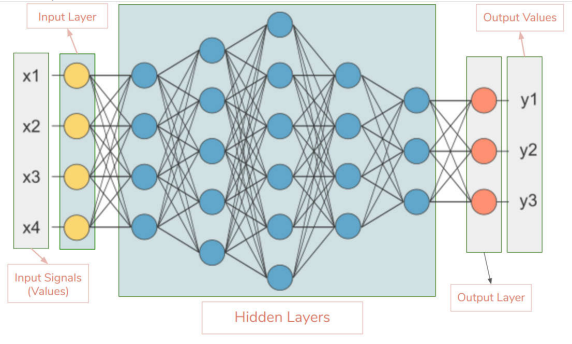

**Import Related Task Cell**

In [ ]:
!pip install nnfs
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
from nnfs.datasets import vertical_data


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


PLOTING Code

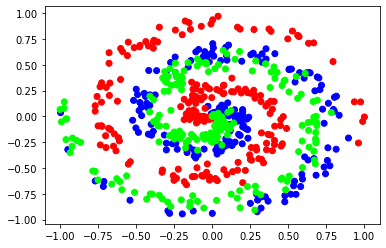

In [ ]:
nnfs.init()

X, y = spiral_data(samples=200, classes=3)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='brg')
plt.show()


DENSE LAYER CLASS

In [ ]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.05 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

ACTIVATION CLASSES SET

In [ ]:
class Activation_Linear:
  def forward(self, inputs):
    self.output = inputs
    
class Activation_Sigmoid:
  def forward(self, inputs):
    self.output = 1 / (1 + np.exp(-inputs))

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities



LOSS COMPUTATION CLASSES


In [ ]:
class Loss:
  def calculate(self, output, y):
    samples_losses = self.forward(output, y)
    data_loss = np.mean(samples_losses)
    return data_loss
  
class Loss_CategoricalCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

    if len(y_true.shape) == 1:
      correct_confidence = y_pred_clipped[range(samples), y_true]
    
    elif len(y_true.shape) == 2:
      correct_confidence = np.sum(y_pred_clipped * y_true, axis=1)
    
    negative_log_likelihood = -np.log(correct_confidence)
    return negative_log_likelihood

class Loss_BinaryCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    sample_losses = -(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
    sample_losses = np.mean(sample_losses, axis=-1)
    return sample_losses

class Loss_MeanSquaredError(Loss):
  def forward(self, y_pred, y_true):
    sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
    return sample_losses

class Loss_MeanAbsoluteError(Loss):
  def forward(self, y_pred, y_true):
    sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)
    return sample_losses
    


CREATION AND TRAINING OF MODEL

In [ ]:
X, y = spiral_data(samples=200, classes=3)

X=np.c_[ X, X[:,0]**2, X[:,1]**2]


'''
    -- Linear - Softmax

dense1 = Layer_Dense(4, 4)
activation1 = Activation_Linear()

dense2 = Layer_Dense(4, 5)
activation2 = Activation_Linear()

dense3 = Layer_Dense(5, 6)
activation3 = Activation_Linear()

dense4 = Layer_Dense(6, 4)
activation4 = Activation_Linear()

dense5 = Layer_Dense(4, 3)
activation5 = Activation_Linear()

dense6 = Layer_Dense(3 ,3)
activation6 = Activation_Softmax()


loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
best_dense3_weights = dense3.weights.copy()
best_dense3_biases = dense3.biases.copy()
best_dense4_weights = dense4.weights.copy()
best_dense4_biases = dense4.biases.copy()
best_dense5_weights = dense5.weights.copy()
best_dense5_biases = dense5.biases.copy()
best_dense6_weights = dense6.weights.copy()
best_dense6_biases = dense6.biases.copy()

for iteration in range(1000):

  dense1.weights += 0.05 * np.random.randn(4, 4)
  dense1.biases += 0.05 * np.random.randn(1, 4)
  dense2.weights += 0.05 * np.random.randn(4, 5)
  dense2.biases += 0.05 * np.random.randn(1, 5)
  dense3.weights += 0.05 * np.random.randn(5, 6)
  dense3.biases += 0.05 * np.random.randn(1, 6)
  dense4.weights += 0.05 * np.random.randn(6, 4)
  dense4.biases += 0.05 * np.random.randn(1, 4)
  dense5.weights += 0.05 * np.random.randn(4, 3)
  dense5.biases += 0.05 * np.random.randn(1, 3)
  dense6.weights += 0.05 * np.random.randn(3, 3)
  dense6.biases += 0.05 * np.random.randn(1, 3)


  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  dense3.forward(activation2.output)
  activation3.forward(dense3.output)
  dense4.forward(activation3.output)
  activation4.forward(dense4.output)
  dense5.forward(activation4.output)
  activation5.forward(dense5.output)
  dense6.forward(activation5.output)
  activation6.forward(dense6.output)
  

  loss = loss_function.calculate(activation6.output, y)

  predictions = np.argmax(activation6.output, axis=1)
  accuracy = np.mean(predictions == y)

  if loss<lowest_loss:
    print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    best_dense3_weights = dense3.weights.copy()
    best_dense3_biases = dense3.biases.copy()
    best_dense4_weights = dense4.weights.copy()
    best_dense4_biases = dense4.biases.copy()
    best_dense5_weights = dense5.weights.copy()
    best_dense5_biases = dense5.biases.copy()
    best_dense6_weights = dense6.weights.copy()
    best_dense6_biases = dense6.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
    dense3.weights = best_dense3_weights.copy()
    dense3.biases = best_dense3_biases.copy()
    dense4.weights = best_dense4_weights.copy()
    dense4.biases = best_dense4_biases.copy()
    dense5.weights = best_dense5_weights.copy()
    dense5.biases = best_dense5_biases.copy()
    dense6.weights = best_dense6_weights.copy()
    dense6.biases = best_dense6_biases.copy()
  
'''

'''
    -- 2. ReLU - Sigmoid



dense1 = Layer_Dense(4, 4)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(4, 5)
activation2 = Activation_ReLU()

dense3 = Layer_Dense(5, 6)
activation3 = Activation_ReLU()

dense4 = Layer_Dense(6, 4)
activation4 = Activation_ReLU()

dense5 = Layer_Dense(4, 3)
activation5 = Activation_ReLU()

dense6 = Layer_Dense(3 ,3)
activation6 = Activation_Sigmoid()


loss_function = Loss_CategoricalCrossentropy()


lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
best_dense3_weights = dense3.weights.copy()
best_dense3_biases = dense3.biases.copy()
best_dense4_weights = dense4.weights.copy()
best_dense4_biases = dense4.biases.copy()
best_dense5_weights = dense5.weights.copy()
best_dense5_biases = dense5.biases.copy()
best_dense6_weights = dense6.weights.copy()
best_dense6_biases = dense6.biases.copy()

for iteration in range(1000):

  dense1.weights += 0.05 * np.random.randn(4, 4)
  dense1.biases += 0.05 * np.random.randn(1, 4)
  dense2.weights += 0.05 * np.random.randn(4, 5)
  dense2.biases += 0.05 * np.random.randn(1, 5)
  dense3.weights += 0.05 * np.random.randn(5, 6)
  dense3.biases += 0.05 * np.random.randn(1, 6)
  dense4.weights += 0.05 * np.random.randn(6, 4)
  dense4.biases += 0.05 * np.random.randn(1, 4)
  dense5.weights += 0.05 * np.random.randn(4, 3)
  dense5.biases += 0.05 * np.random.randn(1, 3)
  dense6.weights += 0.05 * np.random.randn(3, 3)
  dense6.biases += 0.05 * np.random.randn(1, 3)


  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  dense3.forward(activation2.output)
  activation3.forward(dense3.output)
  dense4.forward(activation3.output)
  activation4.forward(dense4.output)
  dense5.forward(activation4.output)
  activation5.forward(dense5.output)
  dense6.forward(activation5.output)
  activation6.forward(dense6.output)
  

  loss = loss_function.calculate(activation6.output, y)

  predictions = np.argmax(activation6.output, axis=1)
  accuracy = np.mean(predictions == y)

  if loss<lowest_loss:
    print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    best_dense3_weights = dense3.weights.copy()
    best_dense3_biases = dense3.biases.copy()
    best_dense4_weights = dense4.weights.copy()
    best_dense4_biases = dense4.biases.copy()
    best_dense5_weights = dense5.weights.copy()
    best_dense5_biases = dense5.biases.copy()
    best_dense6_weights = dense6.weights.copy()
    best_dense6_biases = dense6.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
    dense3.weights = best_dense3_weights.copy()
    dense3.biases = best_dense3_biases.copy()
    dense4.weights = best_dense4_weights.copy()
    dense4.biases = best_dense4_biases.copy()
    dense5.weights = best_dense5_weights.copy()
    dense5.biases = best_dense5_biases.copy()
    dense6.weights = best_dense6_weights.copy()
    dense6.biases = best_dense6_biases.copy()


'''

'''
    -- 3. ReLU - Softmax



dense1 = Layer_Dense(4, 4)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(4, 5)
activation2 = Activation_ReLU()
dense3 = Layer_Dense(5, 6)
activation3 = Activation_ReLU()
dense4 = Layer_Dense(6, 4)
activation4 = Activation_ReLU()
dense5 = Layer_Dense(4 ,3)
activation5 = Activation_ReLU()
dense6 = Layer_Dense(3, 3)
activation6 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
best_dense3_weights = dense3.weights.copy()
best_dense3_biases = dense3.biases.copy()
best_dense4_weights = dense4.weights.copy()
best_dense4_biases = dense4.biases.copy()
best_dense5_weights = dense5.weights.copy()
best_dense5_biases = dense5.biases.copy()
best_dense6_weights = dense6.weights.copy()
best_dense6_biases = dense6.biases.copy()

for iteration in range(1000):

  dense1.weights += 0.05 * np.random.randn(4, 4)
  dense1.biases += 0.05 * np.random.randn(1, 4)
  dense2.weights += 0.05 * np.random.randn(4, 5)
  dense2.biases += 0.05 * np.random.randn(1, 5)
  dense3.weights += 0.05 * np.random.randn(5, 6)
  dense3.biases += 0.05 * np.random.randn(1, 6)
  dense4.weights += 0.05 * np.random.randn(6, 4)
  dense4.biases += 0.05 * np.random.randn(1, 4)
  dense5.weights += 0.05 * np.random.randn(4, 3)
  dense5.biases += 0.05 * np.random.randn(1, 3)
  dense6.weights += 0.05 * np.random.randn(3, 3)
  dense6.biases += 0.05 * np.random.randn(1, 3)


  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  dense3.forward(activation2.output)
  activation3.forward(dense3.output)
  dense4.forward(activation3.output)
  activation4.forward(dense4.output)
  dense5.forward(activation4.output)
  activation5.forward(dense5.output)
  dense6.forward(activation5.output)
  activation6.forward(dense6.output)
  

  loss = loss_function.calculate(activation6.output, y)

  predictions = np.argmax(activation6.output, axis=1)
  accuracy = np.mean(predictions == y)

  if loss<lowest_loss:
    print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    best_dense3_weights = dense3.weights.copy()
    best_dense3_biases = dense3.biases.copy()
    best_dense4_weights = dense4.weights.copy()
    best_dense4_biases = dense4.biases.copy()
    best_dense5_weights = dense5.weights.copy()
    best_dense5_biases = dense5.biases.copy()
    best_dense6_weights = dense6.weights.copy()
    best_dense6_biases = dense6.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
    dense3.weights = best_dense3_weights.copy()
    dense3.biases = best_dense3_biases.copy()
    dense4.weights = best_dense4_weights.copy()
    dense4.biases = best_dense4_biases.copy()
    dense5.weights = best_dense5_weights.copy()
    dense5.biases = best_dense5_biases.copy()
    dense6.weights = best_dense6_weights.copy()
    dense6.biases = best_dense6_biases.copy()

'''


New set of weights found, iteration: 0 loss: 0.6825986 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 0.6570416 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 0.64170694 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 0.62608355 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 0.6099553 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 0.60184216 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 0.5917642 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 0.5843614 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 0.5759801 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 0.5719691 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 0.5571917 acc: 0.3333333333333333
New set of weights found, iteration: 16 loss: 0.55062085 acc: 0.3333333333333333
New set of weights found, iteration: 17 loss